In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
from tqdm import tqdm_notebook as tqdm
from scipy.stats import unitary_group as ug
import random as rd
from time import time

In [ ]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
A[:,0]

In [2]:
def J_matrices(j):

    Jp = np.zeros((2*j+1, 2*j+1))
    Jm = np.zeros((2*j+1, 2*j+1))
    Jz = np.zeros((2*j+1, 2*j+1))

    for a in range(0, 2*j+1):
        for b in range(0, 2*j+1):
            if b == a+1: 
                Jm[a, b] = np.sqrt(j*(j+1)-(b-j)*(b-j-1))
            elif b == a:
                Jz[a, b] = b-j
            elif b == a-1:
                Jp[a, b] = np.sqrt(j*(j+1)-(b-j)*(b-j+1))        
    return Jp, Jm, Jz

In [3]:
def get_F(j=2, k=10, az=1, ay=1):

    Jp, Jm, Jz = J_matrices(j)
    Jz2 = Jz @ Jz
    Jy = (Jp - Jm)/(2j)
    F = expm(-1j*k*Jz2/(2*j+1) - 1j*az*Jz) @ expm(-1j*ay*Jy)

    return F

In [4]:
def dist0(j=2, k=10, az=1, ay=1):
    
    F = get_F(j, k, az, ay)
    w = np.linalg.eigvals(F)
    alpha = np.zeros((len(w)))
    for i in range(len(w)):
        alpha[i] = np.angle(w[i])
    alpha = np.sort(alpha)
    beta = np.diff(alpha)
    
    return alpha, beta

In [5]:
def get_dists0(j=100, k_max=10, npts=6, az=1, ay=1):
    
    alphas = np.zeros((npts, 2*j+1))
    betas = np.zeros((npts, 2*j))
    i=0
    for k in tqdm(np.linspace(0, k_max, npts)):
        alphas[i], betas[i] = dist0(j=j, k=k, az=az, ay=ay)
        i+=1
    return k_max, npts, alphas, betas

In [6]:
def get_histos0(j=100, k_max=10, npts=6, az=1, ay=1):

    _, _, alphas, betas = get_dists0(j=j, k_max=k_max, npts=npts, az=az, ay=ay)

    for i in tqdm(range(0, npts)):
        print("k =", i*k_max/(npts-1))
        print("alphas:")
        plt.hist(alphas[i], bins=100)
        plt.show()
        print("betas:")
        plt.hist(betas[i], color="orange", bins=100)
        plt.show()

k = 0.0
alphas:


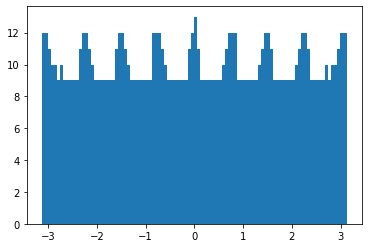

betas:


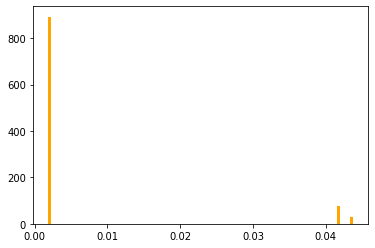

k = 0.5
alphas:


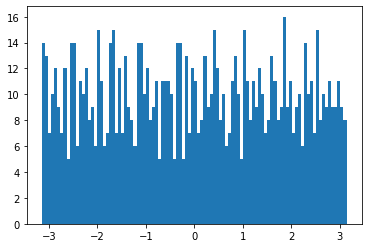

betas:


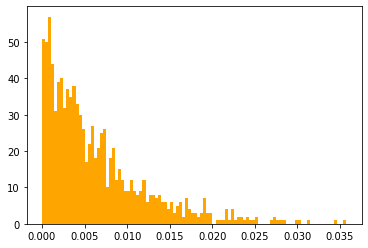

k = 1.0
alphas:


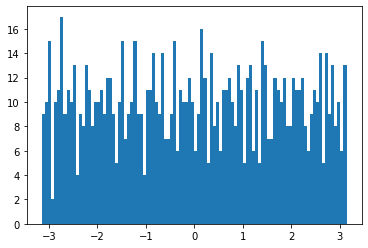

betas:


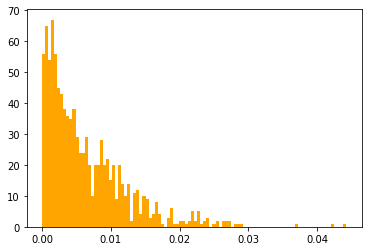

k = 1.5
alphas:


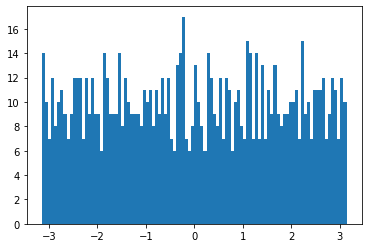

betas:


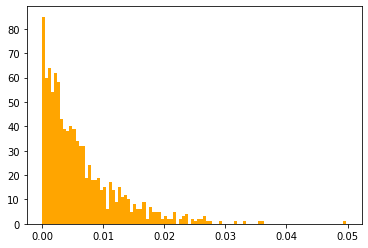

k = 2.0
alphas:


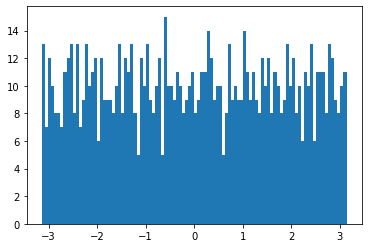

betas:


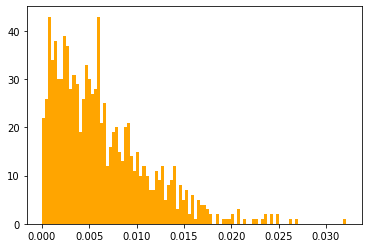

k = 2.5
alphas:


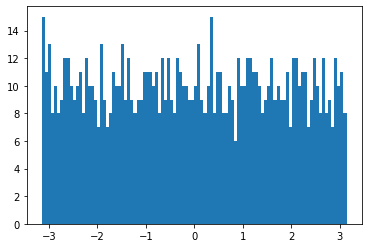

betas:


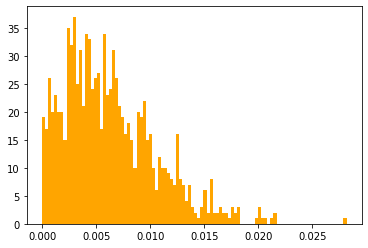

k = 3.0
alphas:


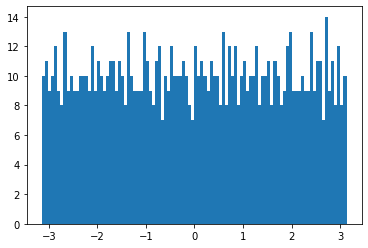

betas:


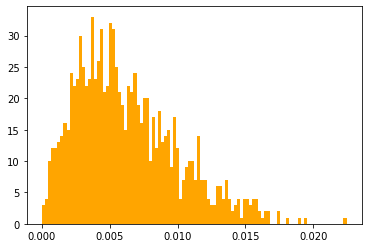

k = 3.5
alphas:


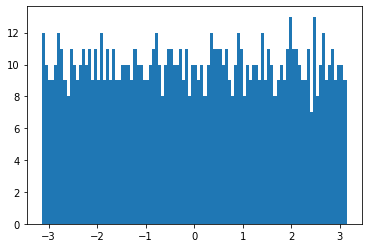

betas:


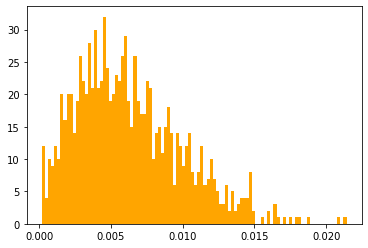

k = 4.0
alphas:


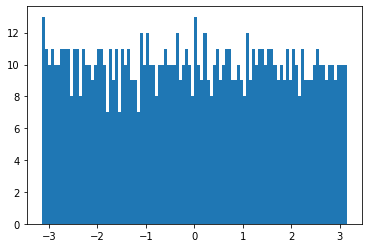

betas:


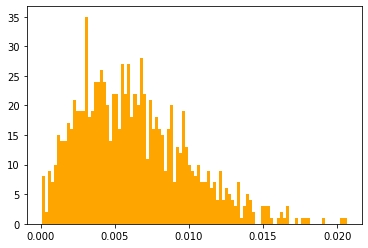

k = 4.5
alphas:


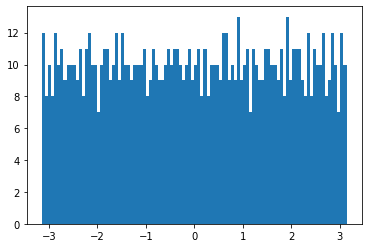

betas:


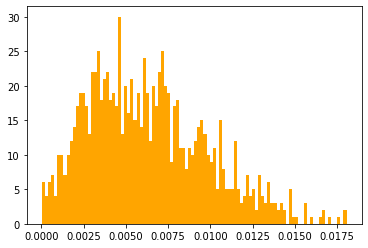

k = 5.0
alphas:


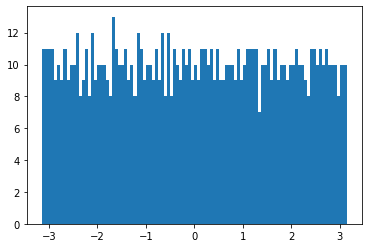

betas:


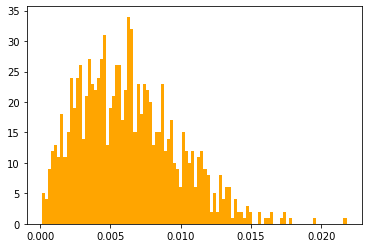

k = 5.5
alphas:


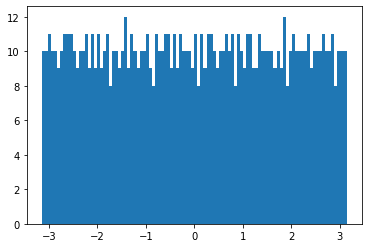

betas:


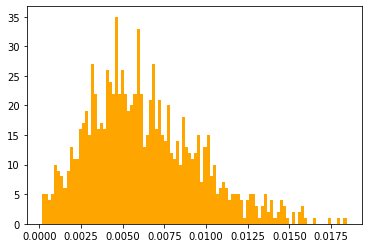

k = 6.0
alphas:


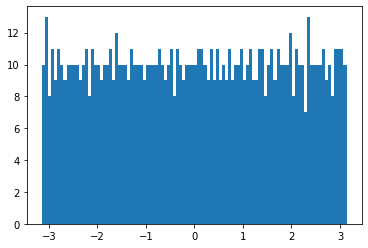

betas:


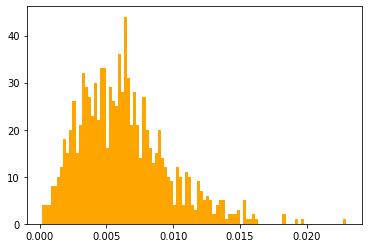

k = 6.5
alphas:


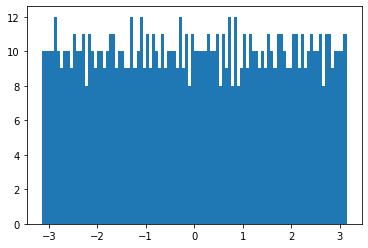

betas:


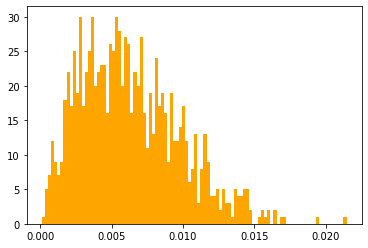

k = 7.0
alphas:


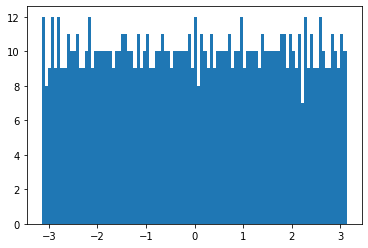

betas:


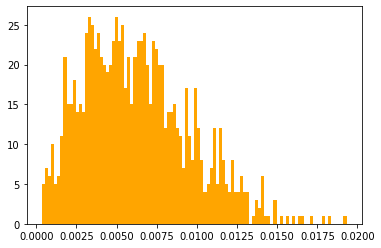

k = 7.5
alphas:


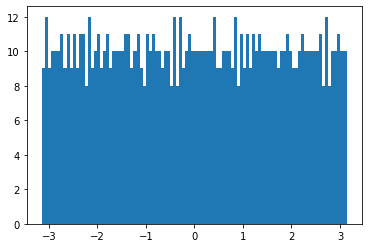

betas:


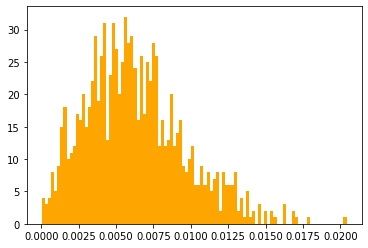

k = 8.0
alphas:


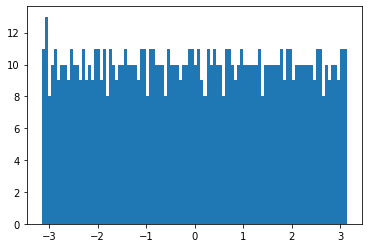

betas:


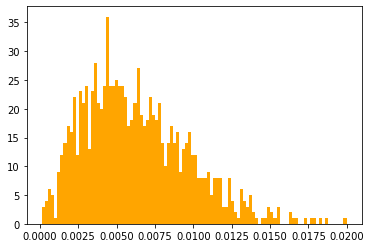

k = 8.5
alphas:


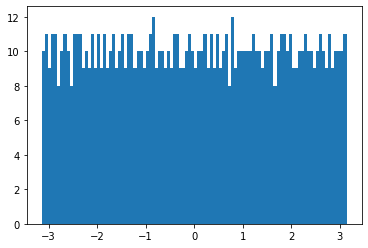

betas:


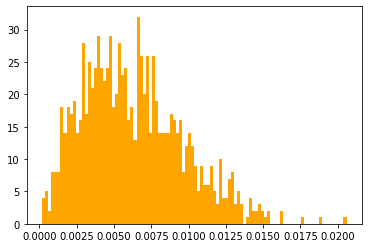

k = 9.0
alphas:


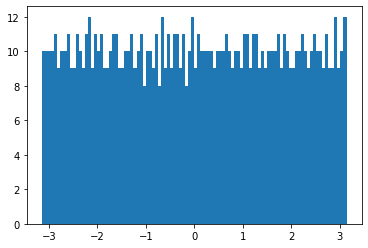

betas:


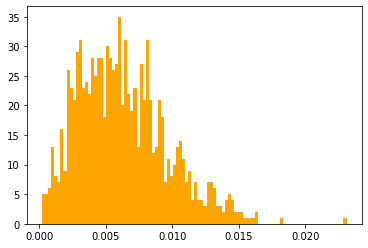

k = 9.5
alphas:


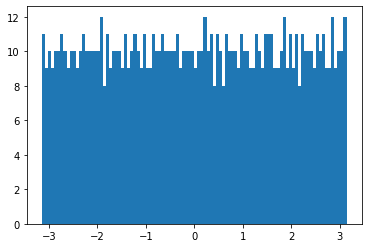

betas:


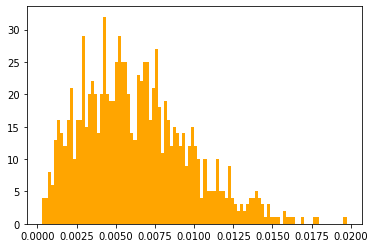

k = 10.0
alphas:


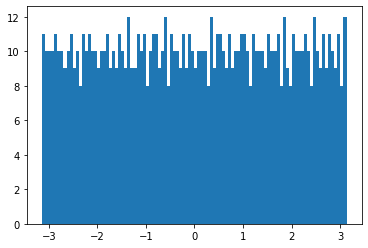

betas:


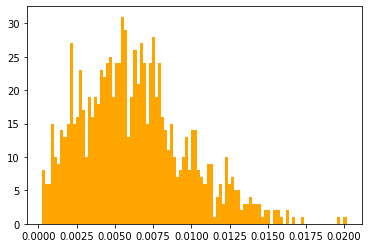

k = 10.5
alphas:


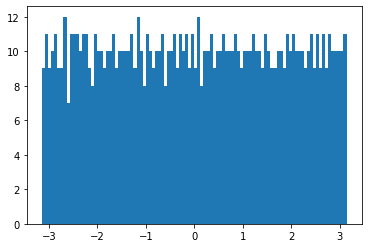

betas:


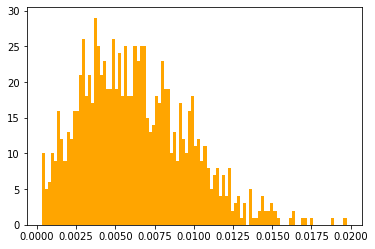

k = 11.0
alphas:


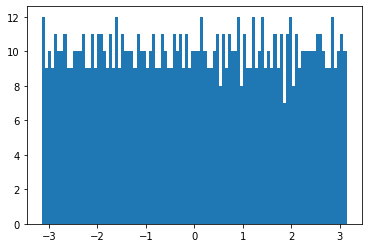

betas:


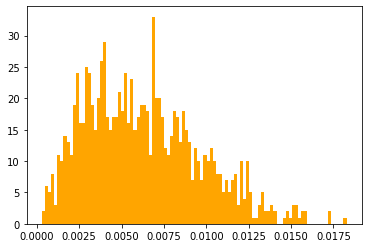

k = 11.5
alphas:


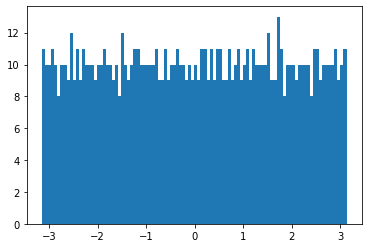

betas:


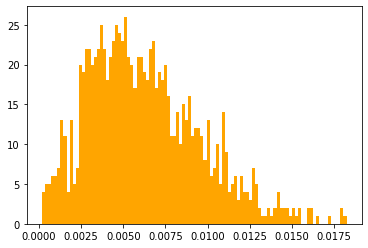

k = 12.0
alphas:


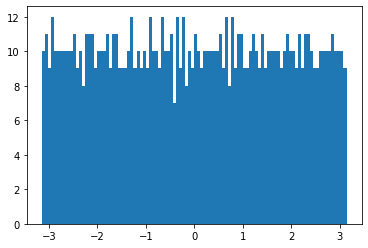

betas:


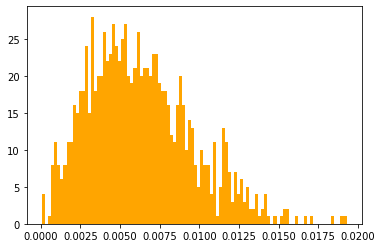

In [32]:
get_histos0(j=500, k_max = 12, npts=25)

# Floquet Operators

In [7]:
def get_F_diag_rand(j):
    F = np.zeros((2*j+1, 2*j+1), dtype=complex)
    for i in range(0, 2*j+1): F[i, i] = np.exp(1j*2*np.pi*rd.random())
    return F

In [8]:
def get_F_rand(j):
    return ug.rvs(2*j+1)

In [9]:
def get_F_more_rand(j):
    A = ug.rvs(2*j+1)
    return A @ A.T

In [18]:
def get_dist(get=None, j=10, k=10):
    if get == get_F: F = get_F(j=j, k=k, az=1, ay=1)
    else: F = get(j=j)
    w = np.linalg.eigvals(F)
    alpha = np.zeros((len(w)))
    for i in range(len(w)): alpha[i] = np.angle(w[i])
    alpha = np.sort(alpha)
    beta = np.diff(alpha)
    gama = beta*(2*j)/(2*np.pi)
    return gama

In [11]:
def y_c(x):
    return (np.pi*x/2)*(np.exp((-np.pi*x**2)/4))

In [12]:
def y_nc(x):
    return np.exp(-x)

In [27]:
def plots(j, k=10):
    t0 = time()
    gamas = np.zeros((4, 2*j))
    #list_F = [get_F, get_F_diag_rand, get_F_rand, get_F_more_rand]
    #list_y = [y_c, y_nc, y_c, y_c]
    #color = ["g", "r", "orange", "black"]
    list_F = [get_F, get_F_diag_rand, get_F_more_rand]
    list_y = [y_c, y_nc, y_c]
    color = ["g", "r", "black"]
    
    for i in tqdm(range(len(list_F))):
        gamas[i] = np.sort(get_dist(list_F[i], j))
        plt.hist(gamas[i], bins=50, color=color[i], density=1)
        x = np.linspace(0, gamas[i][-1], 50)
        plt.plot(x, list_y[i](x), color="blue")
        plt.show()
        t = time()
        print("  [Elapsed time: {:.2f}]\n\n".format(t - t0))

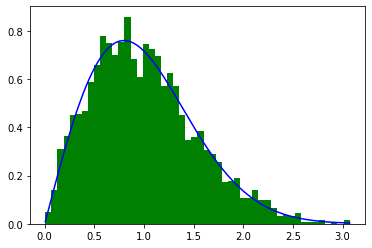

  [Elapsed time: 210.90]




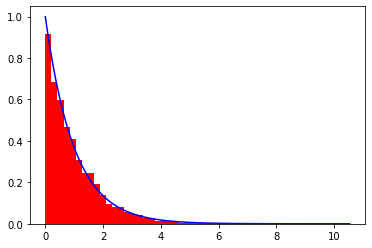

  [Elapsed time: 211.40]




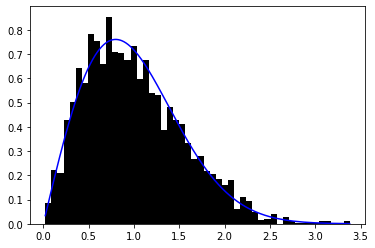

  [Elapsed time: 298.96]





In [27]:
plots(1500)

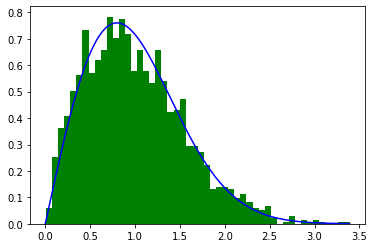

  [Elapsed time: 80.16]




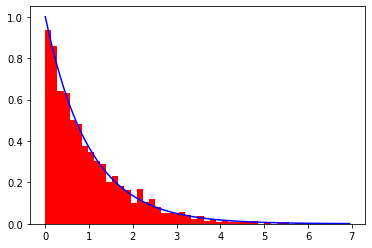

  [Elapsed time: 80.49]




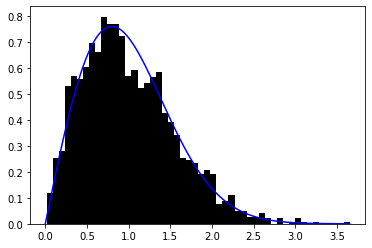

  [Elapsed time: 111.86]





In [28]:
plots(1000)

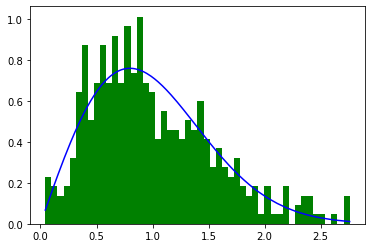

  [Elapsed time: 1.56]




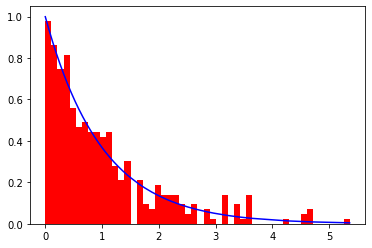

  [Elapsed time: 1.76]




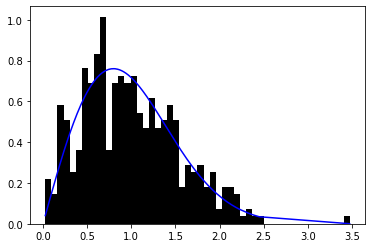

  [Elapsed time: 2.98]





In [19]:
plots(200)

In [23]:
A = [0, 1, 2]
A = np.array(A)
np.append(A, A)

array([0, 1, 2, 0, 1, 2])